<a href="https://colab.research.google.com/github/girishthorat/Fraud-Detection/blob/main/Fraud_Det_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import argmax


In [ ]:
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # data split
from matplotlib import pyplot


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data = pd.read_pickle('/content/drive/MyDrive/Pattern_Recognition /Data.pickle')


In [ ]:
Data['creditLimit'] = StandardScaler().fit_transform(np.array(Data['creditLimit']).reshape(-1, 1))
Data['availableMoney'] = StandardScaler().fit_transform(np.array(Data['availableMoney']).reshape(-1, 1))
Data['transactionAmount'] = StandardScaler().fit_transform(np.array(Data['transactionAmount']).reshape(-1, 1))
Data['currentBalance'] = StandardScaler().fit_transform(np.array(Data['currentBalance']).reshape(-1, 1))
Data['Difference_open'] = StandardScaler().fit_transform(np.array(Data['Difference_open']).reshape(-1, 1))
Data['Difference_exp'] = StandardScaler().fit_transform(np.array(Data['Difference_exp']).reshape(-1, 1))
Data['Difference_address'] = StandardScaler().fit_transform(np.array(Data['Difference_address']).reshape(-1, 1))

In [ ]:
Data.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
count,7.766680e+05,7.766680e+05,7.766680e+05,7.766680e+05,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.00000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,7.766680e+05,7.766680e+05,7.766680e+05,776668.000000
mean,7.045636e-14,4.170789e-15,4.509692e-16,1.910979e-14,0.448723,0.001321,0.991077,0.999914,0.402630,0.302286,0.019557,0.025026,0.190523,0.009548,0.027483,0.001738,0.101908,0.142641,0.095899,0.007725,0.030426,0.00946,0.002811,0.024275,0.043351,0.019039,0.084237,0.257098,0.014070,0.024111,0.065034,0.029137,0.948457,0.025831,-6.669476e-15,5.942918e-17,-5.827390e-15,0.015407
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.497364,0.036322,0.094038,0.009288,0.490428,0.459249,0.138471,0.156205,0.392714,0.097249,0.163486,0.041655,0.302528,0.349707,0.294453,0.087554,0.171757,0.09680,0.052942,0.153903,0.203645,0.136662,0.277743,0.437034,0.117781,0.153393,0.246586,0.168191,0.221103,0.158631,1.000001e+00,1.000001e+00,1.000001e+00,0.123164
min,-9.032733e-01,-8.173843e-01,-9.274101e-01,-6.982235e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.265281e+00,-1.858607e+00,-6.754237e-01,0.000000
25%,-4.948901e-01,-5.826284e-01,-6.995790e-01,-5.913691e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.503185e-01,-8.635414e-01,-6.332574e-01,0.000000
50%,-2.799516e-01,-3.452114e-01,-3.323410e-01,-3.185391e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.919486e-01,-2.626290e-03,-4.344731e-01,0.000000
75%,3.648639e-01,1.411382e-01,3.691622e-01,1.208752e-01,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.230144e-01,8.645123e-01,2.462124e-01,0.000000
max,3.374003e+00,4.930578e+00,1.269195e+01,6.657671e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [ ]:
X= Data.drop(['isFraud'], axis=1)
y= Data['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 9541
Before OverSampling, counts of label '0': 611793 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1223586, 37)
After OverSampling, the shape of train_y: (1223586,) 

After OverSampling, counts of label '1': 611793
After OverSampling, counts of label '0': 611793


In [ ]:
model=Sequential()
model.add(Dense(100,input_dim=37,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3800      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_res,y_train_res , validation_data=( X_test, y_test),batch_size=32,epochs=50,verbose=1)
prediction=model.predict(X_test)

Epoch 1/50
38238/38238 [==============================] - 58s 2ms/step - loss: 0.5341 - accuracy: 0.7274 - val_loss: 0.4526 - val_accuracy: 0.7792
Epoch 2/50
38238/38238 [==============================] - 57s 1ms/step - loss: 0.4537 - accuracy: 0.7815 - val_loss: 0.4211 - val_accuracy: 0.7940
Epoch 3/50
38238/38238 [==============================] - 57s 1ms/step - loss: 0.4227 - accuracy: 0.7991 - val_loss: 0.4347 - val_accuracy: 0.7795
Epoch 4/50
38238/38238 [==============================] - 57s 1ms/step - loss: 0.4098 - accuracy: 0.8057 - val_loss: 0.4660 - val_accuracy: 0.7644
Epoch 5/50
38238/38238 [==============================] - 57s 1ms/step - loss: 0.4021 - accuracy: 0.8097 - val_loss: 0.4606 - val_accuracy: 0.7696
Epoch 6/50
38238/38238 [==============================] - 57s 1ms/step - loss: 0.3954 - accuracy: 0.8137 - val_loss: 0.3646 - val_accuracy: 0.8188
Epoch 7/50
38238/38238 [==============================] - 57s 1ms/step - loss: 0.3913 - accuracy: 0.8158 - val_loss: 0

In [ ]:
lr_auc = roc_auc_score(y_test, prediction)

In [ ]:
lr_auc

0.737484328156097

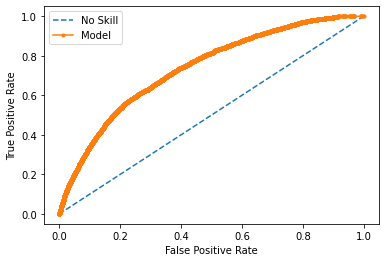

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.445583


In [ ]:
ynn=(prediction>best_thresh).astype(int)

In [ ]:
print(classification_report(y_test, ynn))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85    152909
           1       0.04      0.60      0.07      2425

    accuracy                           0.74    155334
   macro avg       0.51      0.67      0.46    155334
weighted avg       0.98      0.74      0.84    155334

